In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

Data read:

In [2]:
df = pd.read_json('deviation.json')

Path to save plots:

In [5]:
folder = 'plots'
files = ['boxplot_errors_by_corners.pdf',
         'hist_mean_errors_by_corners.pdf',
         'hist_max_errors_by_corners.pdf',
         'hist_floor_ceiling_distribution.pdf',
         'boxplot_floor_vs_ceiling.pdf']

Model perfomance metrics:

In [6]:
    n = len(df)
    rmse = np.sqrt(df['mean'].transform(np.square).sum() / n)
    mae = df['mean'].sum() / n
    print('RMSE: ' + str(rmse))
    print('MAE: ' + str(mae))

RMSE: 25.355837746729346
MAE: 12.89532038162962


 Class for drawing plots:

In [7]:
class PlotHelper:
    def __init__(self, data):
        self.data = data

    def save_plot(self, filename):
        plt.savefig(filename)

    def box_plot_by_corners(self, should_save=False, filename=''):
        grouped = self.data.groupby('rb_corners')['mean']
        plt.boxplot([grouped.get_group(4), grouped.get_group(6), grouped.get_group(8)])
        plt.xticks([1, 2, 3], ['4 corners', '6 corners', '8 corners'])
        plt.title('Mean error distribution')
        if should_save:
            plt.savefig(filename, format='pdf')
        plt.show()

    def hist_max_error_by_corners(self, bins=40, should_save=False, filename=''):
        self.data['max'].hist(by=self.data['rb_corners'], bins=bins)
        if should_save:
            plt.savefig(filename, format='pdf')
        plt.show()

    def hist_mean_error_by_corners(self, bins=40, should_save=False, filename=''):
        self.data['mean'].hist(by=self.data['rb_corners'], bins=bins)
        if should_save:
            plt.savefig(filename, format='pdf')
        plt.show()

    def box_plot_floor_ceiling_distribution(self, should_save=False, filename=''):
        plt.boxplot([self.data['floor_mean'], self.data['ceiling_mean']])
        plt.xticks([1, 2], ['floor_mean', 'ceiling_mean'])
        plt.ylim(0, 50)
        plt.title('Ceiling vs floor errors distribution')
        if should_save:
            plt.savefig(filename, format='pdf')
        plt.show()

    def hist_floor_ceiling_distribution(self, bins=40, should_save=False, filename=''):
        fig, (ax1, ax2) = plt.subplots(2)
        ax1.hist(self.data['ceiling_mean'], label='Ceiling mean error', bins=bins)
        ax1.legend()
        ax2.hist(self.data['floor_mean'], label='Floor mean error', bins=bins)
        ax2.legend()
        if should_save:
            plt.savefig(filename, format='pdf')
        plt.show()


def draw_plots(data, folder, file_names):
    plot_helper = PlotHelper(data)
    names = [os.path.join(folder, name) for name in file_names]

    plot_helper.box_plot_by_corners(should_save=True, filename=names[0])
    plot_helper.hist_mean_error_by_corners(should_save=True, filename=names[1])
    plot_helper.hist_max_error_by_corners(should_save=True, filename=names[2])
    plot_helper.hist_floor_ceiling_distribution(should_save=True, filename=names[3])
    plot_helper.box_plot_floor_ceiling_distribution(should_save=True, filename=names[4])
    return names

Drawing plots:

In [9]:
plot_helper = PlotHelper(df)

**Model perfomance based on corners in a room:**

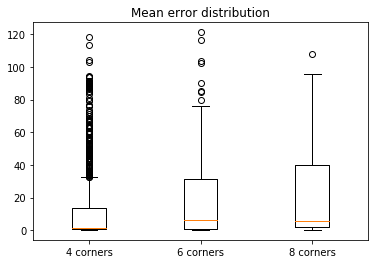

In [11]:
plot_helper.box_plot_by_corners()

Histogramm of mean errors grouped by corner count:

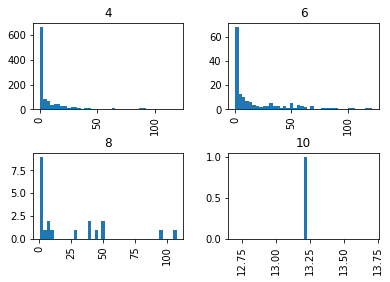

In [13]:
plot_helper.hist_mean_error_by_corners()

Histogramm of mean errors grouped by corner count:

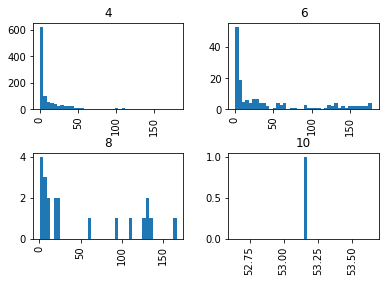

In [14]:
 plot_helper.hist_max_error_by_corners()

**Floor vs ceiling model perfomance comparison**

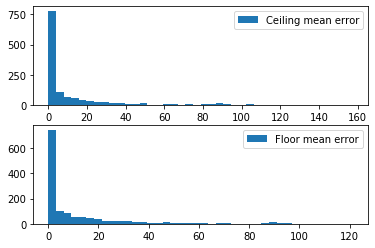

In [15]:
plot_helper.hist_floor_ceiling_distribution()

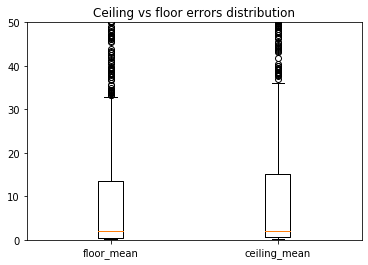

In [16]:
plot_helper.box_plot_floor_ceiling_distribution()

All together:

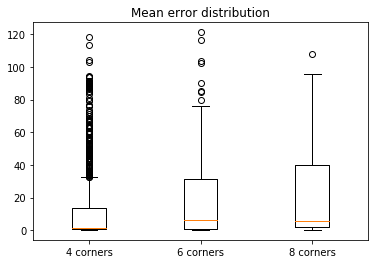

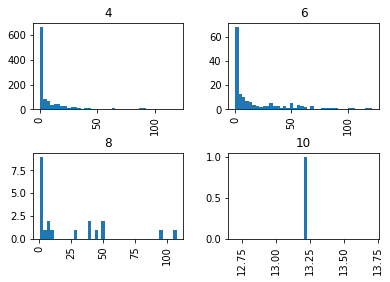

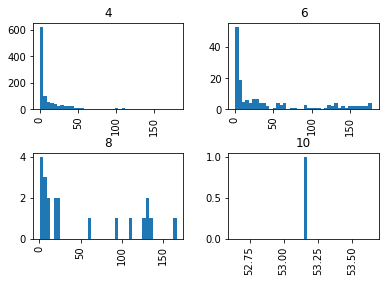

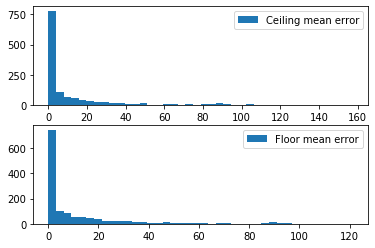

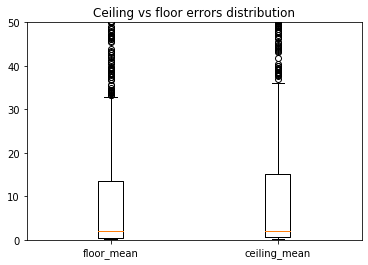

['plots\\boxplot_errors_by_corners.pdf',
 'plots\\hist_mean_errors_by_corners.pdf',
 'plots\\hist_max_errors_by_corners.pdf',
 'plots\\hist_floor_ceiling_distribution.pdf',
 'plots\\boxplot_floor_vs_ceiling.pdf']

In [8]:
draw_plots(df, folder, files)